<a href="https://colab.research.google.com/github/Young4424/Machine-Learning-Deep-learning-Myself/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EC%B4%88_Ch1%262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH1. 생선 분류 문제

## 도미 데이터

In [72]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

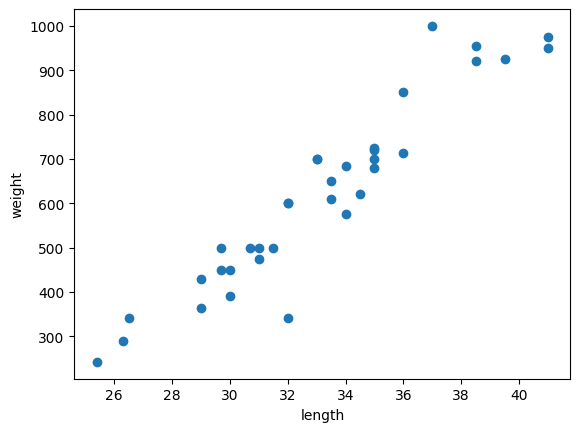

In [73]:
import matplotlib.pyplot as plt

plt.scatter(bream_length,bream_weight)
plt.xlabel('length') # X축은 길이
plt.ylabel('weight') # Y축은 무게
plt.show()

## 빙어 데이터

In [74]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

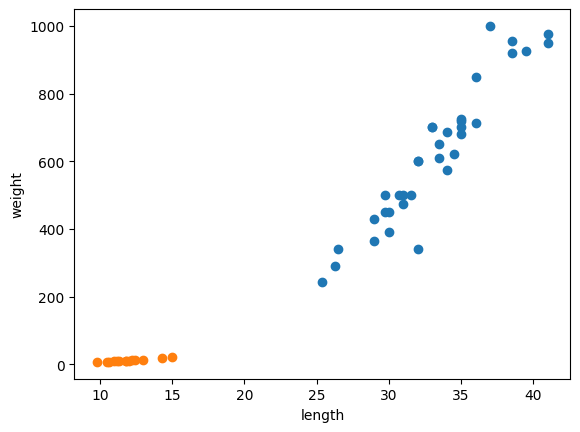

In [75]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.xlabel('length') # X축은 길이
plt.ylabel('weight') # Y축은 무게
plt.show()

## k-최근접 이웃 알고리즘

In [76]:
# 두 개의 데이터 합하기

length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [77]:
# 리스트를 세로 방향으로 늘어뜨린 2차원 리스트 만들기

fish_data = [[l,w] for l, w in zip(length,weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [78]:
# 정답 데이터 - 도미 : 1, 빙어 : 0

fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
# 클래스의 객체 형성
kn = KNeighborsClassifier()

In [81]:
# 훈련: 도미를 찾기 위한 기준을 학습시키기
kn.fit(fish_data,fish_target)

KNeighborsClassifier()

In [82]:
# score : 정확도 계산하기
kn.score(fish_data,fish_target)

1.0

In [83]:
# predict : 새로운 데이터의 정답을 예측하기
kn.predict([[30,600]])

array([1])

In [84]:
print(kn._fit_X)
print(kn._y)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [85]:
# n의 개수 : 가장 가까운 데이터 n개를 사용
kn49 = KNeighborsClassifier(n_neighbors=49)

In [86]:
kn49.fit(fish_data,fish_target)
kn49.score(fish_data,fish_target)

0.7142857142857143

In [87]:
kn = KNeighborsClassifier()
kn.fit(fish_data,fish_target)

for n in range(5,50):
    # k-최근접 이웃 개수 설정
    kn.n_neighbors = n

    # 점수 계산

    score = kn.score(fish_data,fish_target)

    # 100% 정확도에 미치지 못하는 이웃 개수 출력
    if score < 1:
        print(n,score)
        break

18 0.9795918367346939


# CH2. 데이터 다루기

## 2-1 훈련 세트와 테스트 세트

In [88]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [89]:
fish_data = [[l,w] for l, w in zip(fish_length,fish_weight)]
fish_target = [1]* 35 + [0] * 14

In [90]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [91]:
# 인덱스 슬라이싱
print(fish_data[0:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [92]:
# 훈련 세트로 입력값 중 0부터 34번쨰 인덱스까지 사용
train_input = fish_data[:35]

# 훈련 세트로 타겟값 중 0부터 34번쨰까지 인덱스로 사용
train_target = fish_target[:35]

# 테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용
test_input = fish_data[35:]

# 테스트 세트로 타깃값 중 35번쨰부터 마지막 인덱스까지 사용
test_target = fish_target[35:]


In [93]:
kn = kn.fit(train_input,train_target)
kn.score(test_input,test_target)

# 훈련 데이터에서, 테스트 세트에는 빙어만 드어가 있어서 샘플링 편향(sampling bias)가 일어남


0.0

In [94]:
import numpy as np

In [95]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [96]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [97]:
# (샘플 수, 특성수)를 출력한다
print(input_arr.shape)

(49, 2)


### 랜덤하게 샘플을 선택하기

In [98]:
# 인덱스를 섞은 다음 input_arr와 target_arr에서 샘플을 선택하면 무작위로 훈련 세트를 나누는 셈

np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

In [99]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [100]:
# 넘파이 배열 인덱싱 : 1개의 인덱스가 아닌 여러 개의 인덱스로 한 번에 여러 개의 원소를 선택할 수 있음

print(input_arr[[1,3]]) # 두 번째, 네 번째 샘플 선택

[[ 26.3 290. ]
 [ 29.  363. ]]


In [101]:
# 샘플에 대한 35개의 훈련 세트 만들기

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [102]:
"""
index의 첫 번째 값은 13이므로, train_input의 첫 번째 원소는 input_arr의 14번째 원소와 같다.
"""

print(input_arr[13], train_input[0])



[ 32. 340.] [ 32. 340.]


In [103]:
# 샘플에 대한 나머지 14개의 테스트 세트 만들기

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]


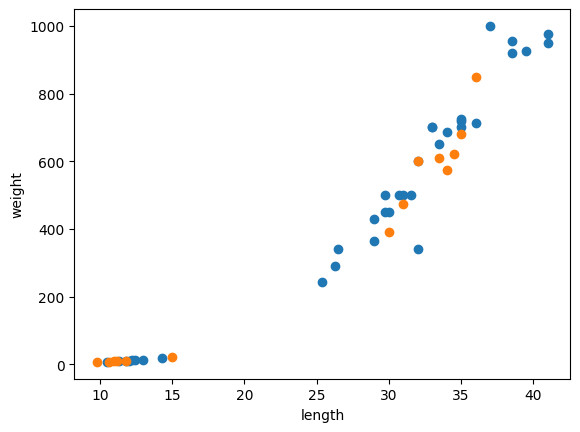

In [104]:
import matplotlib.pyplot as plt

# 모든 행에서 1번째 열, 두 번쨰 열 선택한다

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [105]:
"""
fit 메서드를 실행할 때마다 KNeighborsClassifier 클래스의 객체는 이전에 학습한 것들을 모두 잊어버린다.

이전 모델을 그대로 두고 싶다면 클래스 객체를 새로 만들어야 한다.

"""

'\nfit 메서드를 실행할 때마다 KNeighborsClassifier 클래스의 객체는 이전에 학습한 것들을 모두 잊어버린다.\n\n이전 모델을 그대로 두고 싶다면 클래스 객체를 새로 만들어야 한다.\n\n'

In [106]:
kn = kn.fit(train_input,train_target)

In [107]:
kn.score(test_input,test_target)

1.0

In [108]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [109]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

## 2-2. 데이터 전처리

In [110]:
"""
데이터 전처리, 표준 점수, 브로드캐스팅

올바른 결과 도출을 위해 데이터를 사용하기 전에 데이터 전처리 과정을 거친다. 전처리 과정을 거친 데이터로 훈련했을 때의 차이를 알고
표준점수로 특성 스테일을 변환하는 방법을 배운다.

"""

'\n데이터 전처리, 표준 점수, 브로드캐스팅\n\n올바른 결과 도출을 위해 데이터를 사용하기 전에 데이터 전처리 과정을 거친다. 전처리 과정을 거친 데이터로 훈련했을 때의 차이를 알고\n표준점수로 특성 스테일을 변환하는 방법을 배운다.\n\n'

In [111]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [112]:
import numpy as np

# colum_stack(): 전달받은 리스트를 이렬로 세운 다음 차례대로 나란히 연결한다. 연결한 리스트는 튜플로 전달한다.
# 튜플을 사용하면 함수로 전달한 값이 바뀌지 않는다는 것을 믿을 수 있기 때문에 매개변수 값으로 많이 사용한다.

np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

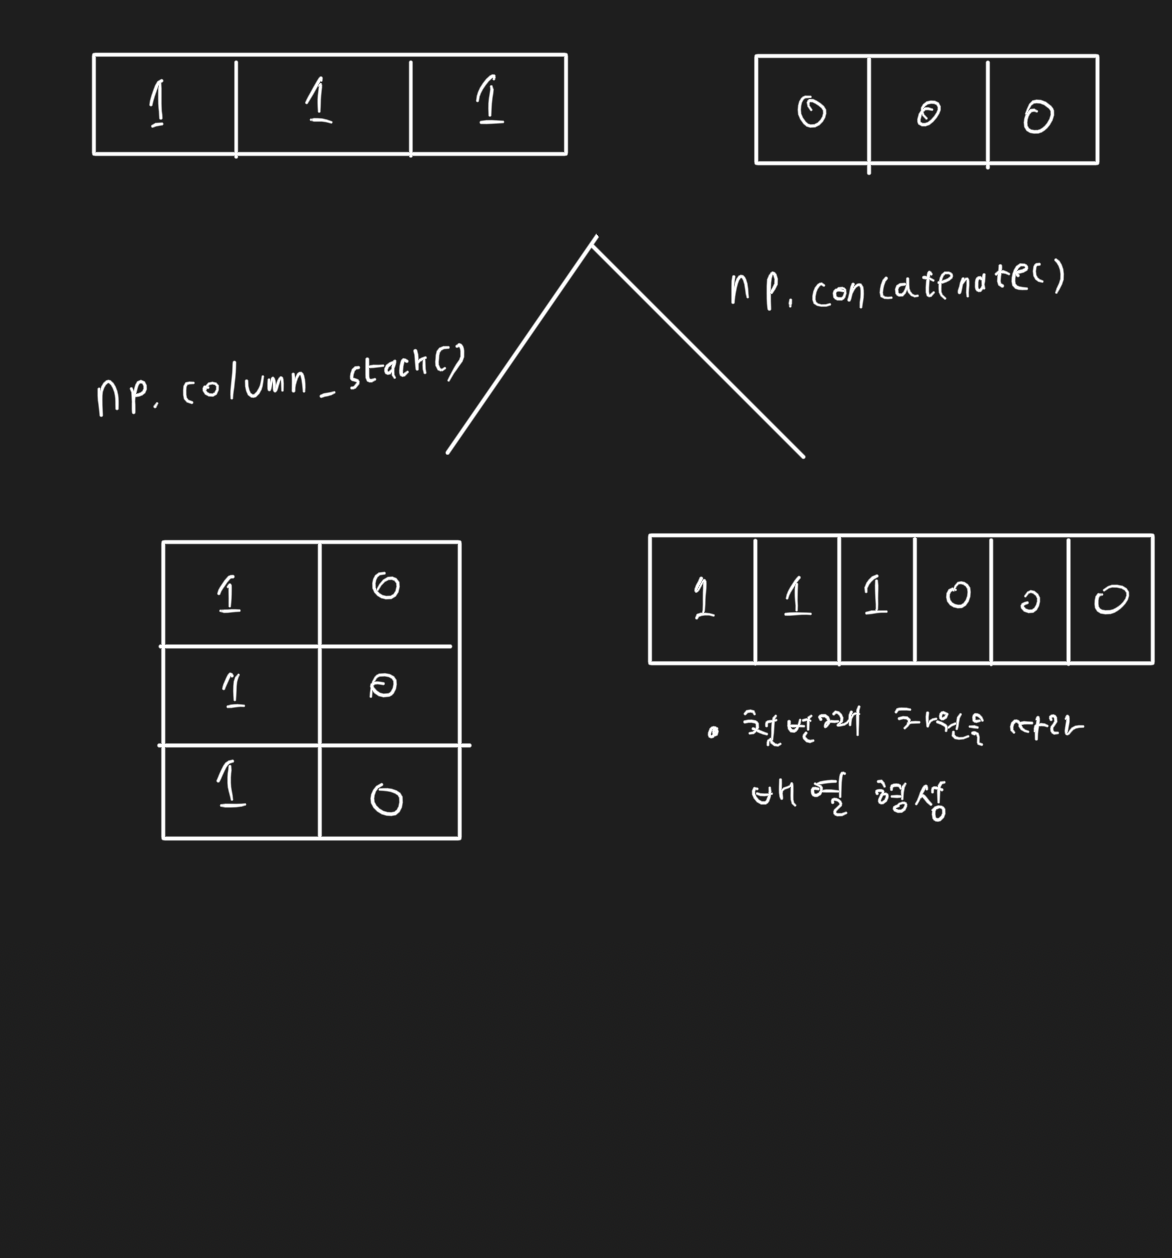

In [113]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [114]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [115]:
# np.concatenate() 첫 번쨰 차원을 따라 배열을 연결한다.
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

In [116]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
train_input, test_input, train_target, test_target = train_test_split(fish_data,fish_target,random_state = 42)

In [119]:
# 입력 데이터 - 2차원 배열
print(train_input.shape,test_input.shape)


(36, 2) (13, 2)


In [120]:
# 타깃 데이터 - 1차원 배열
print(train_target.shape, test_target.shape)

(36,) (13,)


In [121]:
print(test_target)

# 10개가 도미, 3개가 빙어이고 샘플링 편향이 조금 나타남

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [122]:
# stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눔

train_input, test_input, train_target, test_target = train_test_split(fish_data,fish_target,stratify=fish_target, random_state =42)

In [123]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


#### 수상한 도미 한마리

In [124]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

In [125]:
# 도미 데이터 입력
print(kn.predict([[25,150]])) # 방어로 예측하고 있음

[0.]


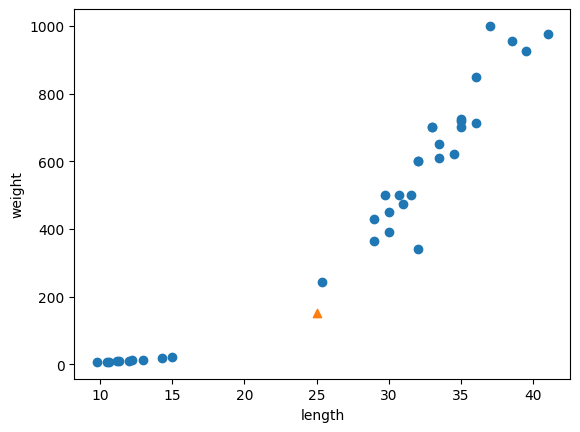

In [126]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [128]:
# 샘플의 주변 샘플 알아보기
distances, indexes = kn.kneighbors([[25,150]])

Text(0, 0.5, 'weight')

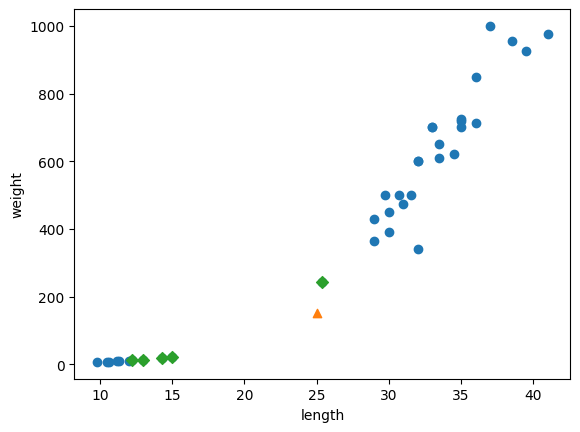

In [130]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker = '^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')

In [131]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [132]:
print(train_target[indexes])

# 방어(0)가 가깝다고 함

[[1. 0. 0. 0. 0.]]


In [ ]:
"""
산점도로 볼 때에는 직관적으로 도미와 가깝게 보이나, 방어로 나옴
해결의 실마리를 찾기 위해 kneighbors() 메서드에서 반환된 distances 배열을 출력해볼 필요가 있다.
이 배열에는 이웃 샘플까지의 거리가 담겨져 있다.

"""

In [133]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


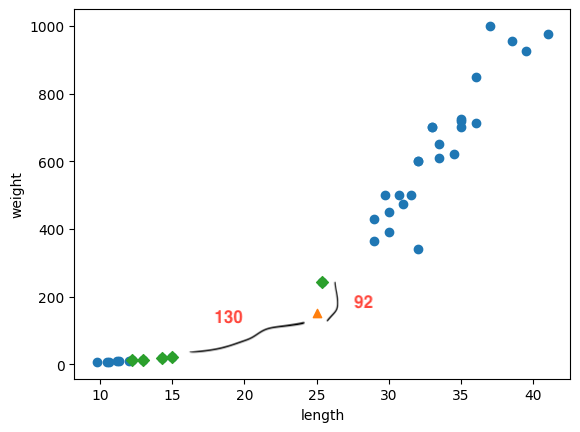

In [ ]:
"""

x축은 범위가 좁고(10~40), y축은 범위가 넓기 때문에(0~1000) y축에서 조금만 멀어져도 거리가 아주 큰 값으로 계산되고,
이 때문에 오른쪽 위의 도미 샘플이 이웃으로 선택되지 못했다.

눈으로 명확하게 하기 위해 x축의 범위를 0~1000으로 동일하게 맞추어 본다.

"""

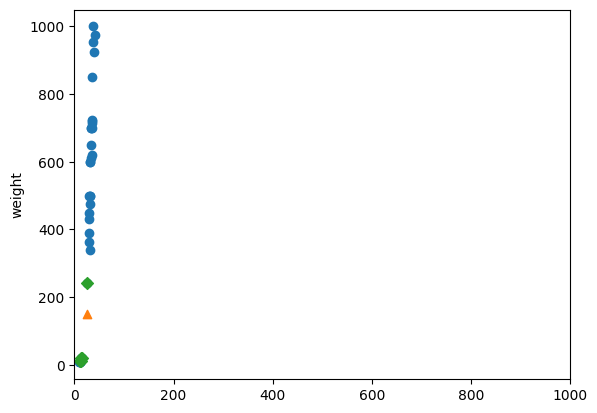

In [135]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker = '^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker = 'D')

# x축 혹은 y축 범위를 지정한다고 할 때, xlim, ylim 함수를 이용한다.
plt.xlim((0,1000))
plt.ylabel('weight')
plt.show()


# 오로지 생선의 무게(Y축)만 고려대상이 된다고 볼 수 있다.
# 두 특성(길의와 무게)의 값이 놓인 범위가 다를 때, 두 특성의 스케일(scale)이 다르다고도 말한다.
# 이러한 특성값들을 일정한 기준으로 맞춰 주는 작업을 데이터 전처리(Data preprocessing)이라고 부른다.

##### 전처리 방식 **1. 표준점수(standard score, z score)**

---

각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는 지를 나타낸다. 이를 통해, 실제 특성값의 크기와 상관없이 동일한 조건으로 비교할 수 있다.


cf) 표준편차 : 분산의 제곱근으로 데이터가 분산된 정도를 나타냄,

표준점수는 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는 지를 나타내는 값이다.

In [136]:
mean = np.mean(train_input,axis = 0)
std = np.std(train_input,axis = 0) # axis : 행을 따라 각 열의 통계값을 계산함

In [137]:
print(mean,std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [139]:
# 넘파이의 브로드캐스팅을 이용해, train_input의 모든 행에서 mean에 있는 두 평균값을 알아서 빼준다.
# 그 다음, std에 있는 두 표준편차를 다시 모든 행에 적용해준다.
train_scaled = (train_input - mean) /std

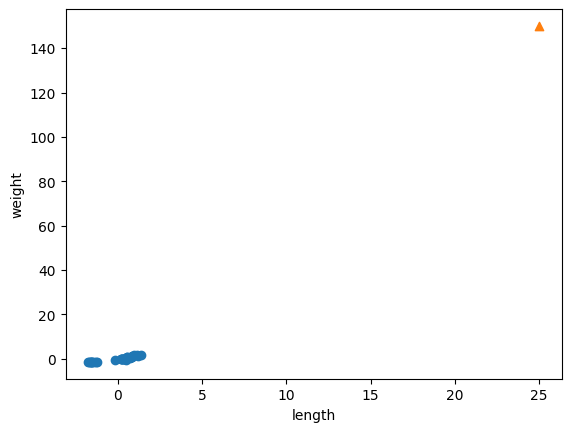

In [142]:
# 전처리 데이터로 모델 훈련하기


plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25,150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 샘플 25,150을 동일한 비율로 변환하지 않으면 이러한 현상이 발생한다.
# 훈련 세트의 mean,std를 이용하여 변환하여야 한다.

Text(0, 0.5, 'weight')

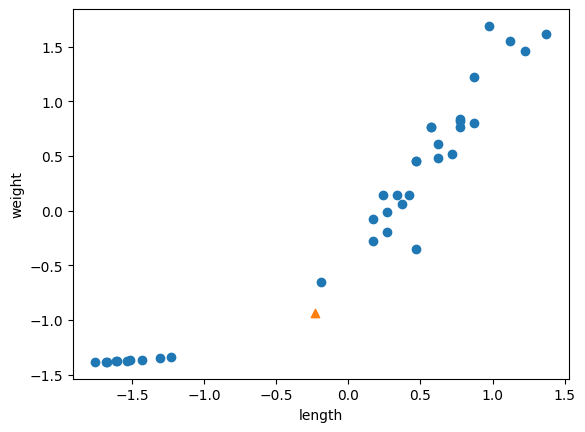

In [143]:
new = ([25,150] - mean) / std

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')

In [144]:
kn.fit(train_scaled,train_target)

KNeighborsClassifier()

In [145]:
# 테스트 세트 또한 훈련 세트이 평균과 표준편차로 변환해야 한다.
# 그렇지 않으면 데이터의 스케일이 같이지지 않으므로 훈련한 모델이 쓸모가 없게 된다.

test_scaled = (test_input - mean) / std

In [146]:
kn.score(test_scaled,test_target)

1.0

In [147]:
print(kn.predict([new])) # 예측 성공

[1.]


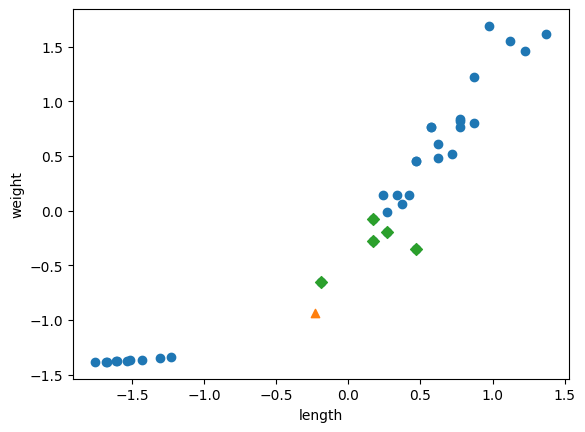

In [149]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker = '^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,[1]],marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()